# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

houses = pd.read_csv("boston_data.csv")
houses.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

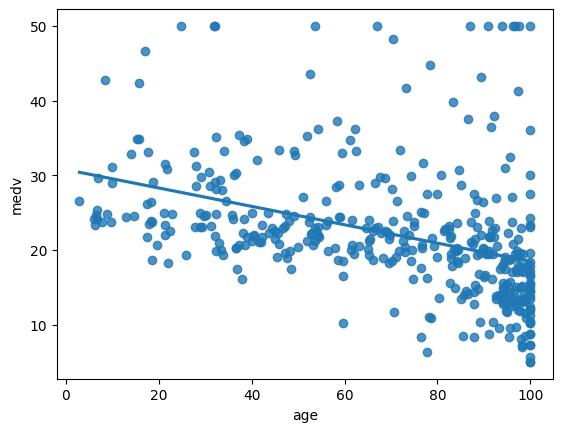

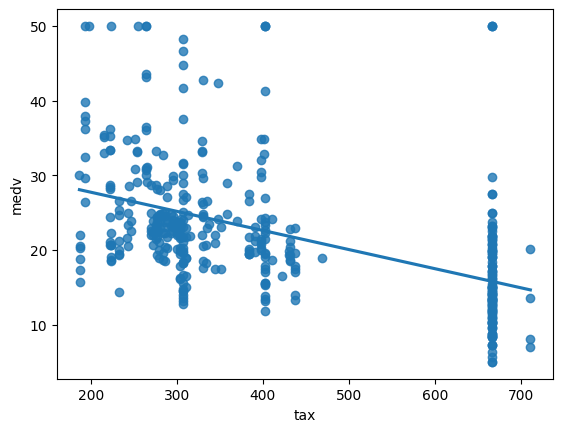

In [22]:
# I chose age and tax. I do not know what the other features mean, because I don't have the dataset documentation

sns.regplot(data=houses,x=houses["age"], y=houses["medv"], ci=None)
plt.show()

sns.regplot(data=houses,x=houses["tax"], y=houses["medv"], ci=None)
plt.show()


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# They have a negative correlation. When age or tax goes up, the prices go down.


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

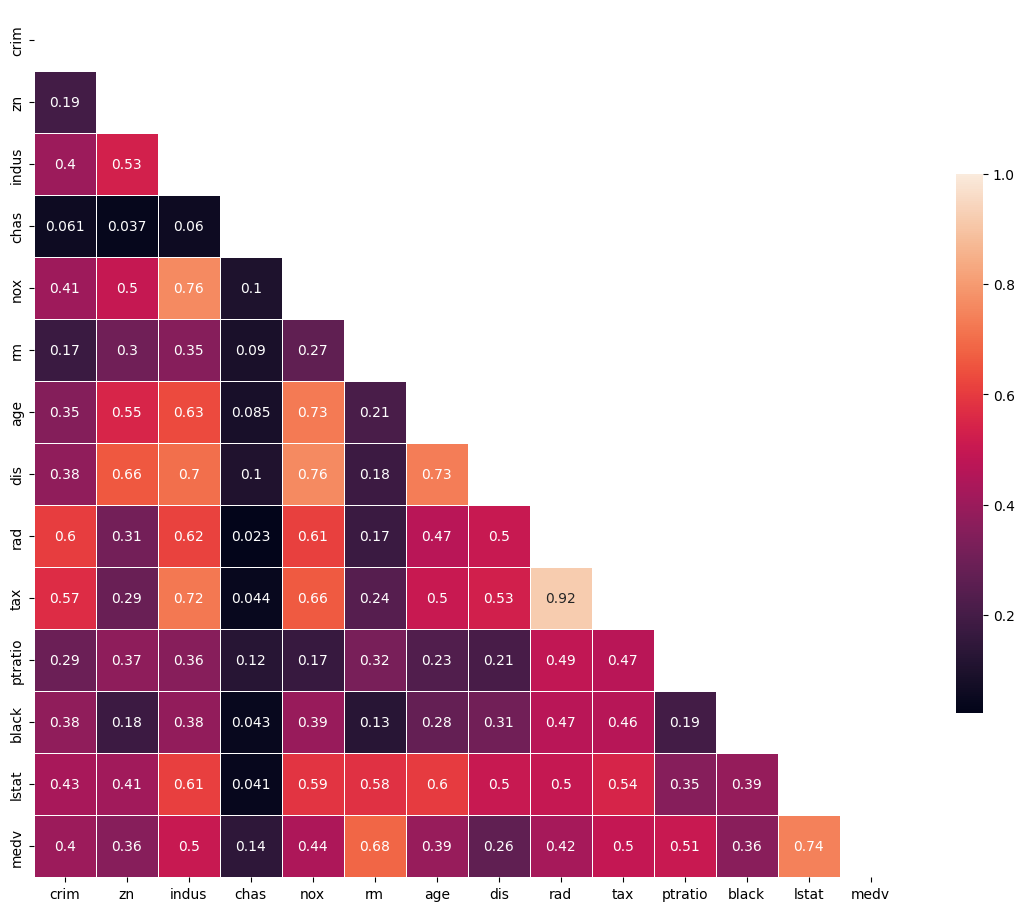

'\nYes: lstat, ptratio, rad, rm, indus\n'

In [26]:
# Choose the best features

corr=np.abs(houses.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

"""
Yes: lstat, ptratio, rad, rm, indus
"""

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [29]:
print("Min: ",houses["medv"].min())
print("Max: ",houses["medv"].max())
print("Mean: ",houses["medv"].mean())
print("Median: ",houses["medv"].median())
print("Std: ",houses["medv"].std())

Min:  5.0
Max:  50.0
Mean:  22.312376237623763
Median:  21.4
Std:  8.837018646457969


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [30]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [32]:
features = houses.drop("medv",axis=1)
target = houses["medv"]

X_train, X_test, y_train, y_test = train_test_split(features, target) 


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [35]:
# Five separate RFR here with the given max depths

from sklearn.ensemble import RandomForestRegressor

depths = [2,4,6,8,10]
train_scores = []
test_scores = []

for depth in depths: 
    model = RandomForestRegressor(n_estimators = 100,
                              max_depth = depth, 
                              )
    model.fit(X_train, y_train)
    
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))



Now, plot the score for each tree on the training set and on the testing set.

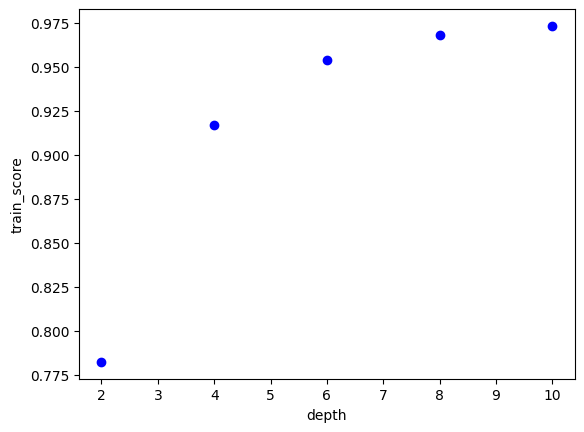

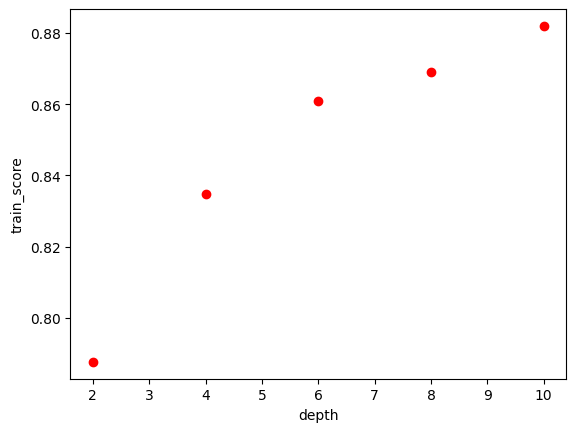

In [40]:
plt.scatter(depths,train_scores, color="blue")
plt.xlabel("depth")
plt.ylabel("train_score")
plt.show()

plt.scatter(depths,test_scores, color="red")
plt.xlabel("depth")
plt.ylabel("train_score")
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# The score goes up with the increase of depth

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Depth 1: high bias and low variance
# Depth 10: high variance and low bias


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
"""
We should do hyperparameter tuning (Grid Search or Random Search) to find the best maximum depth
"""

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
"""
I think the model should be produced with recent data, as many factors affect the prices of housing 
throughout the years
"""